### This Notebook is a playground for SCE in a static Causal Hans Setting

#### Imports and Global Configurations

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os
from IPython.display import Image
from CausalHansTSCE import CausalHansDataTSCE, CausalHansInterpreterTSCE
from TSCE.CausalNodeTSCE import CausalNodeTSCE
from TSCE.tree_helper import find_sequences
from Utils.load import load_dataset
from Utils.images import getDynDirImg, getTimeAsString, generateTreeImage
from Utils.helper import find_valid_id

In [7]:
IMG_BASE_PATH = os.path.join("tmp_img", "TSCE")
os.makedirs(IMG_BASE_PATH, exist_ok=True)

#### Load Data and Prepare Data-Object for SCE (Selection Person to look at)

In [8]:
PATH_TO_DATA = os.path.join("tmp_data", "tsce_causalhans.pkl")
data = CausalHansDataTSCE(load_dataset(PATH_TO_DATA))
interpreter = CausalHansInterpreterTSCE(data)
cExamples= interpreter._get_valid_question_ts_and_person("Mobility", num=350)
print(f"Number found examples: {len(cExamples)}")

Number found examples: 350


In [9]:
print(cExamples[0])
print(data.get_person_at_ts(cExamples[0][1], cExamples[0][0]))
print(data.get_person_at_ts(cExamples[0][1]-1, cExamples[0][0]))

(2999, 50)
{'Age': 105.98114498234231, 'Nutrition': 51.69136463364595, 'Health': 9.909709744620306, 'Mobility': 4.697488800480169}
{'Age': 104.98114498234231, 'Nutrition': 50.41416335679724, 'Health': 9.575350120860369, 'Mobility': 4.5705569857736394}


Trying to find a Changing Sequence. Consistent Sequence appear more often. Depending on the Distribution..

In [10]:
fitting_ids = [] 
for i in range(len(cExamples)):
    cPerson ,cTs,  = cExamples[i]
    cExpTree = interpreter.getExpTree(cPerson, cTs, "Mobility", max_depth=4)
    cExplanations = interpreter.getExplanation(cExpTree)
    if len(cExplanations) == 4:
        fitting_ids.append(i)

print(fitting_ids)     

[2, 3, 4, 6, 8, 9, 10, 12, 14, 15, 16, 19, 21, 22, 23, 26, 28, 29, 30, 31, 33, 36, 37, 38, 39, 41, 43, 44, 45, 46, 48, 49, 50, 51, 53, 55, 56, 57, 59, 60, 61, 63, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 80, 81, 82, 83, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 123, 124, 125, 126, 129, 130, 131, 132, 135, 136, 138, 139, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 157, 158, 159, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 216, 217, 218, 219, 220, 221, 224, 225, 226, 228, 229, 232, 233, 234, 236, 237, 240, 241, 242, 244, 245, 248, 249, 250, 252, 253, 256, 257, 258, 259, 260, 263, 264, 265, 267, 268, 271, 272, 273, 275, 276, 278, 279, 280, 282, 283, 285, 286, 287, 288, 289, 290, 291, 292, 293, 295, 296,

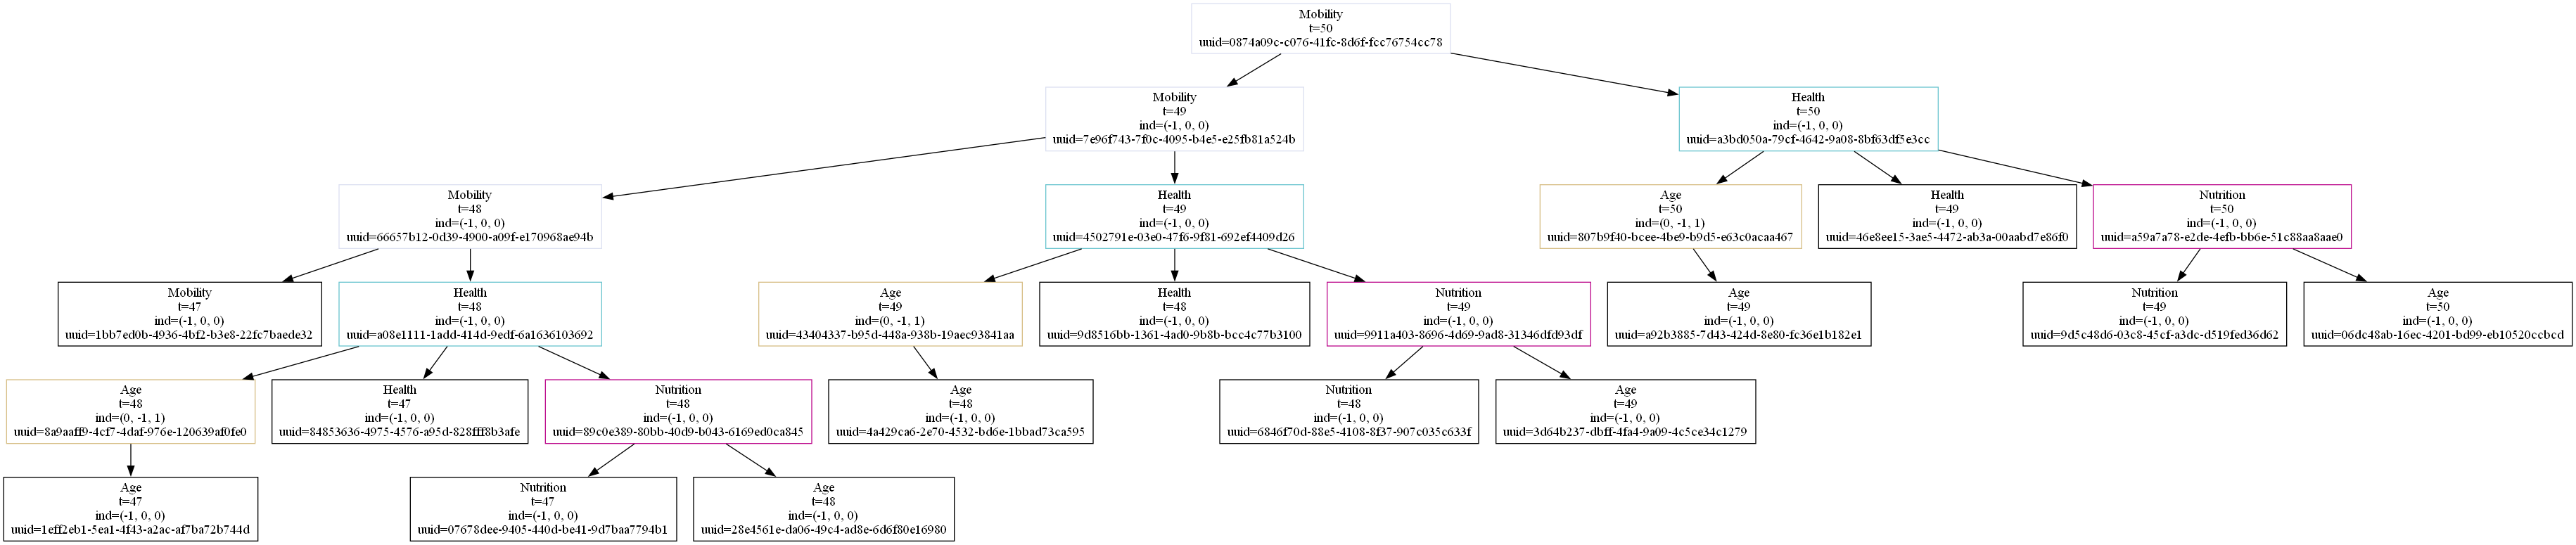

Hans Mobility constantly over the last 3 years was below average because of his low Mobility continously 1 year before and because of his low Health in the objected year.

His Health constantly over the last 3 years was below average because of his low Health continously 1 year before, because of his low Nutrition in the objected year, mostly although his low Age in the objected year.

His Age constantly over the last 3 years was below average because of his low Age continously 1 year before.

His Nutrition constantly over the last 3 years was below average because of his low Nutrition continously 1 year before and because of his low Age in the objected year.



In [12]:
cPerson ,cTs,  = cExamples[fitting_ids[0]]
cExpTree = interpreter.getExpTree(cPerson, cTs, "Mobility", max_depth=3)

filepath = os.path.join("tmp_img", "TSCE",  f"tssce_{getTimeAsString()}.png")
generateTreeImage(cExpTree, filepath=filepath)
display(Image(filename=filepath))

cExplanations = interpreter.getExplanation(cExpTree)
for cExplanation in list(cExplanations):
    print(cExplanation)
    print() 